In [2]:
#------------------------------------#
#------------- packages--------------#
#------------------------------------#

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import geopandas as gpd
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
from geopy.exc import GeocoderTimedOut

import requests

import folium

import os

In [2]:
pids = pd.read_csv('StudyParticipants.csv')
aware_ids = pd.read_csv('aware_device.csv')

# merge the two dataframes on ParticipantID and keep only the rows from pids
pids = pd.merge(pids, aware_ids, on='ParticipantID', how='left')
pids

,ParticipantID,Phone,Awair,AwairID,Work,device_id,brand,build_id,manufacturer,model
0,edr,iPhone,AW-13145,70886b1232f6,Link Lab,393b2587-70fc-4e41-9368-7a14648375e3,iPhone,Darwin Kernel Version 21.4.0: Mon Feb 21 21:27...,Apple,iPhone
1,egl,iPhone,AW-13145,70886b1232f6,Link Lab,a268bf35-24a7-40eb-a1fc-94142ffd3e58,iPhone,Darwin Kernel Version 21.4.0: Mon Feb 21 21:27...,Apple,iPhone
2,j02,iPhone,AW-25396,70886b125db1,Off Grounds BR,9e61c8ae-5a4f-41b0-80ba-08ab06d495c6,iPhone,Darwin Kernel Version 21.3.0: Wed Jan 5 21:44...,Apple,iPhone
3,uja,iPhone,AW-16515,70886b123935,Link Lab,0dd46ec9-e40a-4791-9cee-3058dadc1959,iPhone,Darwin Kernel Version 21.4.0: Mon Feb 21 21:27...,Apple,iPhone
4,lpz,Android,AW-29799,70886b127d5c,Off Grounds BR,5f863ec2-9314-41eb-8425-bf7173194f00,samsung,SP1A.210812.016.A526U1UES5CVD1,Samsung,SM-A526U1
5,oyb,Android,AW-23619,70886b126976,Link Lab,18519687-7d50-4493-8bdb-309d4d29dfd8,google,SP2A.220305.012,Google,Pixel 4a
6,mr1,iPhone,AW-23810,70886b126a7b,Link Lab,78004874-9c43-4d4f-8962-2db67c6ffe4a,iPhone,Darwin Kernel Version 21.4.0: Mon Feb 21 21:27...,Apple,iPhone
7,xil,Android,AW-22996,70886b12532b,Link Lab,08d621fd-54ca-43de-9102-46bb2a17cce6,google,SP2A.220505.002,Google,Pixel 4a
8,pgm,iPhone,AW-15886,70886b123bc8,Link Lab,f7a16ee5-b15c-4034-ba52-4becf44cc74b,iPhone,Darwin Kernel Version 21.4.0: Mon Feb 21 21:27...,Apple,iPhone
9,h9u,iPhone,AW-27185,70886b12697a,Off Grounds,04346571-51a9-4272-b6b1-52ac48248515,iPhone,Darwin Kernel Version 21.3.0: Wed Jan 5 21:44...,Apple,iPhone


In [3]:
# # if ParticipantID has more than one row, then take device_id from second row as device_id2 for the first row
# pids['device_id2'] = pids.groupby('ParticipantID')['device_id'].shift(-1)
# # remove rows with duplicate ParticipantID
# pids = pids.drop_duplicates(subset='ParticipantID', keep='first')
# # reorganize columns: ParticipantID, AWAIR, Work, Phone, device_id, device_id2, manufacturer, model, buid_id
# pids = pids[['ParticipantID', 'AWAIR', 'Work', 'Phone', 'device_id', 'device_id2', 'manufacturer', 'model', 'build_id']]

pids

,ParticipantID,Phone,Awair,AwairID,Work,device_id,brand,build_id,manufacturer,model
0,edr,iPhone,AW-13145,70886b1232f6,Link Lab,393b2587-70fc-4e41-9368-7a14648375e3,iPhone,Darwin Kernel Version 21.4.0: Mon Feb 21 21:27...,Apple,iPhone
1,egl,iPhone,AW-13145,70886b1232f6,Link Lab,a268bf35-24a7-40eb-a1fc-94142ffd3e58,iPhone,Darwin Kernel Version 21.4.0: Mon Feb 21 21:27...,Apple,iPhone
2,j02,iPhone,AW-25396,70886b125db1,Off Grounds BR,9e61c8ae-5a4f-41b0-80ba-08ab06d495c6,iPhone,Darwin Kernel Version 21.3.0: Wed Jan 5 21:44...,Apple,iPhone
3,uja,iPhone,AW-16515,70886b123935,Link Lab,0dd46ec9-e40a-4791-9cee-3058dadc1959,iPhone,Darwin Kernel Version 21.4.0: Mon Feb 21 21:27...,Apple,iPhone
4,lpz,Android,AW-29799,70886b127d5c,Off Grounds BR,5f863ec2-9314-41eb-8425-bf7173194f00,samsung,SP1A.210812.016.A526U1UES5CVD1,Samsung,SM-A526U1
5,oyb,Android,AW-23619,70886b126976,Link Lab,18519687-7d50-4493-8bdb-309d4d29dfd8,google,SP2A.220305.012,Google,Pixel 4a
6,mr1,iPhone,AW-23810,70886b126a7b,Link Lab,78004874-9c43-4d4f-8962-2db67c6ffe4a,iPhone,Darwin Kernel Version 21.4.0: Mon Feb 21 21:27...,Apple,iPhone
7,xil,Android,AW-22996,70886b12532b,Link Lab,08d621fd-54ca-43de-9102-46bb2a17cce6,google,SP2A.220505.002,Google,Pixel 4a
8,pgm,iPhone,AW-15886,70886b123bc8,Link Lab,f7a16ee5-b15c-4034-ba52-4becf44cc74b,iPhone,Darwin Kernel Version 21.4.0: Mon Feb 21 21:27...,Apple,iPhone
9,h9u,iPhone,AW-27185,70886b12697a,Off Grounds,04346571-51a9-4272-b6b1-52ac48248515,iPhone,Darwin Kernel Version 21.3.0: Wed Jan 5 21:44...,Apple,iPhone


In [4]:
aware = []

for r,d,f in os.walk("/Users/beatriceli/Documents/PhD_Research/GitHub/well-being/lll_aware"):
    for file in f:
        if file.endswith("locations.csv"):
            temp = pd.read_csv(os.path.join(r,file),parse_dates=["device_id"])
            #temp["value"] = (temp["value"] - temp["value"].min()) 
            aware.append(temp)

aware = pd.concat(aware)
# create columns called "ParticipantID" and "Work" and get value from matching device_id in aware to device_id in pids
aware['ParticipantID'] = aware['device_id'].map(pids.set_index('device_id')['ParticipantID'])
aware['Work'] = aware['device_id'].map(pids.set_index('device_id')['Work'])
# convert epoch time to datetime and round to nearest second
aware['timestamp'] = pd.to_datetime(aware['timestamp'], unit='ms').dt.round('s')

aware.head()

,_id,timestamp,device_id,double_latitude,double_longitude,double_bearing,double_speed,double_altitude,provider,accuracy,accuracy.1,ParticipantID,Work
0,27492,2022-05-06 14:30:39,3c23fa1b-4058-4685-bb71-ca06ffea3757,38.032120,-78.510380,-1.0,-1.0,166.994610,fused,35.0,NaN,vxx,Link Lab
1,27493,2022-05-06 14:33:39,3c23fa1b-4058-4685-bb71-ca06ffea3757,38.032120,-78.510380,-1.0,-1.0,166.994610,fused,35.0,NaN,vxx,Link Lab
2,27494,2022-05-06 14:36:39,3c23fa1b-4058-4685-bb71-ca06ffea3757,38.031862,-78.510286,-1.0,-1.0,166.571178,fused,35.0,NaN,vxx,Link Lab
3,27495,2022-05-06 14:39:39,3c23fa1b-4058-4685-bb71-ca06ffea3757,38.031863,-78.510284,-1.0,-1.0,166.561459,fused,35.0,NaN,vxx,Link Lab
4,27496,2022-05-06 14:42:39,3c23fa1b-4058-4685-bb71-ca06ffea3757,38.031817,-78.510353,-1.0,-1.0,166.598457,fused,35.0,NaN,vxx,Link Lab


In [5]:
# get number of rows with no ParticipantID
aware['ParticipantID'].isnull().sum()
# get device_id for rows with no ParticipantID
aware[aware['ParticipantID'].isnull()]['device_id'].unique() # only one device-id with no ParticipantID: '42f346aa-b3ea-435a-b912-c5dec85b7f8b'
# get number of rows with no Work
aware['Work'].isnull().sum()
# get device_id for rows with no Work
aware[aware['Work'].isnull()]['device_id'].unique() # only one device-id with no Work: '42f346aa-b3ea-435a-b912-c5dec85b7f8b'
# if  the entire column for accuracy.1 is null, then drop the column
aware = aware.dropna(axis=1, how='all')
# remove rows with no ParticipantID
aware = aware[aware['ParticipantID'].notna()]
aware.head()


,_id,timestamp,device_id,double_latitude,double_longitude,double_bearing,double_speed,double_altitude,provider,accuracy,ParticipantID,Work
0,27492,2022-05-06 14:30:39,3c23fa1b-4058-4685-bb71-ca06ffea3757,38.032120,-78.510380,-1.0,-1.0,166.994610,fused,35.0,vxx,Link Lab
1,27493,2022-05-06 14:33:39,3c23fa1b-4058-4685-bb71-ca06ffea3757,38.032120,-78.510380,-1.0,-1.0,166.994610,fused,35.0,vxx,Link Lab
2,27494,2022-05-06 14:36:39,3c23fa1b-4058-4685-bb71-ca06ffea3757,38.031862,-78.510286,-1.0,-1.0,166.571178,fused,35.0,vxx,Link Lab
3,27495,2022-05-06 14:39:39,3c23fa1b-4058-4685-bb71-ca06ffea3757,38.031863,-78.510284,-1.0,-1.0,166.561459,fused,35.0,vxx,Link Lab
4,27496,2022-05-06 14:42:39,3c23fa1b-4058-4685-bb71-ca06ffea3757,38.031817,-78.510353,-1.0,-1.0,166.598457,fused,35.0,vxx,Link Lab


In [6]:
# remove unecessary columns
# drop _id, device_id
aware = aware.drop(['_id', 'device_id'], axis=1)
# move ParticipantID and Work to the front of the dataframe
aware = aware[['ParticipantID', 'Work', 'timestamp', 'double_latitude', 'double_longitude']]
aware.shape[0]

303368

In [7]:
aware.head()

,ParticipantID,Work,timestamp,double_latitude,double_longitude
0,vxx,Link Lab,2022-05-06 14:30:39,38.032120,-78.510380
1,vxx,Link Lab,2022-05-06 14:33:39,38.032120,-78.510380
2,vxx,Link Lab,2022-05-06 14:36:39,38.031862,-78.510286
3,vxx,Link Lab,2022-05-06 14:39:39,38.031863,-78.510284
4,vxx,Link Lab,2022-05-06 14:42:39,38.031817,-78.510353


In [8]:
# get first and last timestamp for each ParticipantID
aware.groupby('ParticipantID')['timestamp'].agg(['min', 'max'])

,min,max
ParticipantID,,
edr,2022-04-26 14:53:23,2022-07-24 17:32:50
egl,2022-04-26 14:53:18,2022-07-04 13:26:14
h9u,2022-05-05 16:31:26,2022-07-24 23:29:01
heh,2022-04-28 17:00:19,2022-07-09 02:43:40
j02,2022-04-28 15:52:28,2022-06-22 16:50:01
lpz,2022-04-28 16:52:43,2022-07-10 09:57:50
mr1,2022-05-04 14:43:00,2022-07-08 16:52:42
oyb,2022-04-28 16:42:29,2022-04-29 02:42:09
pgm,2022-05-05 15:57:04,2022-06-28 23:29:09


/Users/beatriceli/miniconda3/envs/wellbeing/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1259: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(
/var/folders/zd/_7gwj5650vb4smtfpkjw268h0000gn/T/ipykernel_59812/1002131033.py:14: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, alpha=0.5)


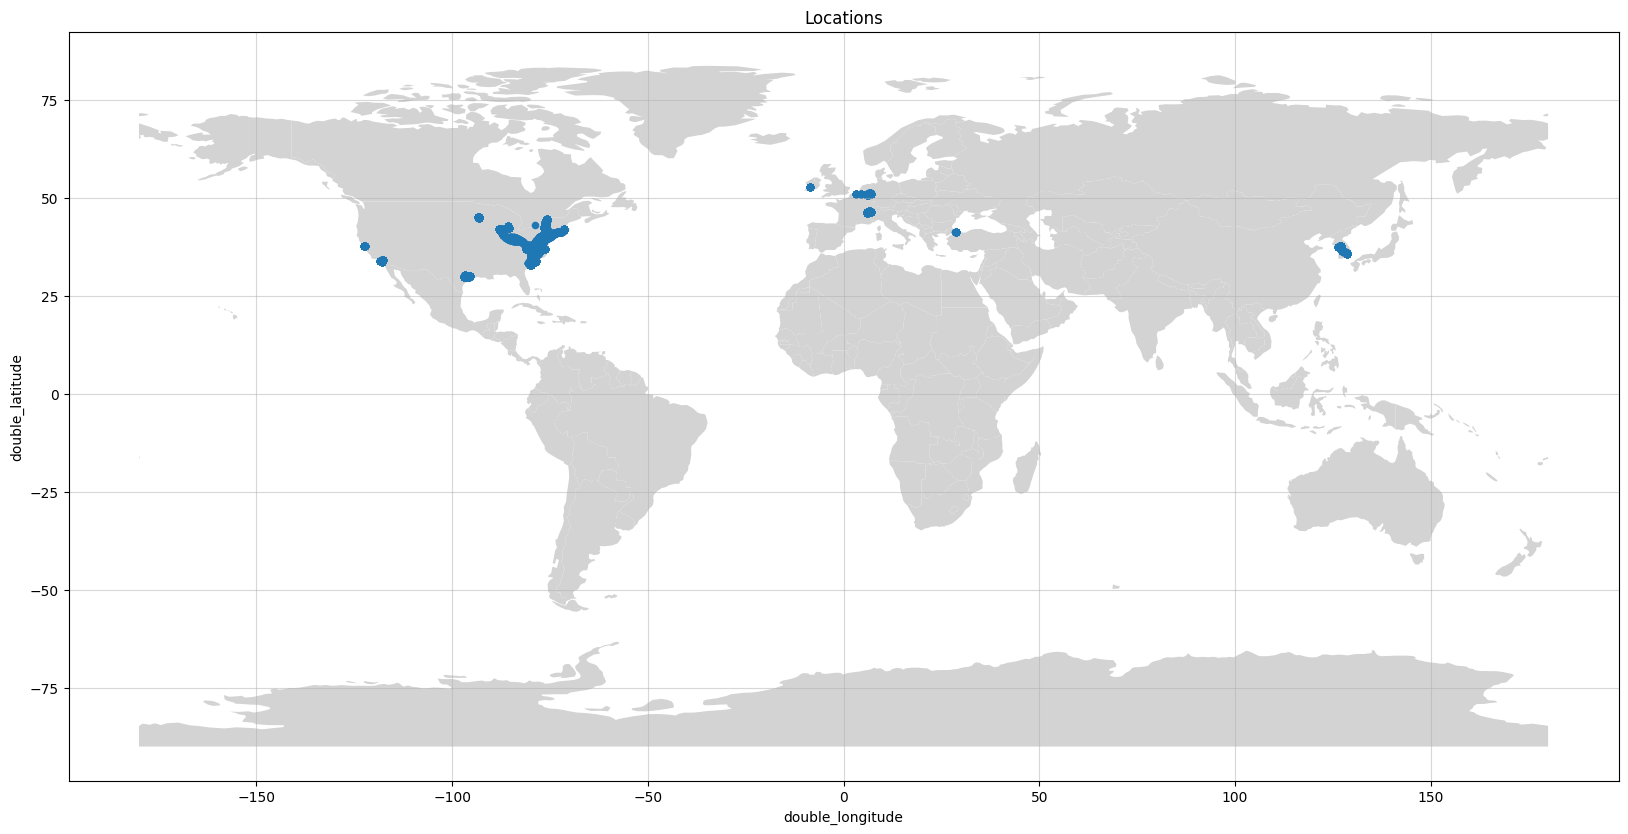

In [9]:
# initialize an axis
fig, ax = plt.subplots(figsize=(20,20))
# plot map on axis
countries = gpd.read_file(  
     gpd.datasets.get_path("naturalearth_lowres"))
countries.plot(color="lightgrey",
                                                 ax=ax)

# plot points
aware.plot(x="double_longitude", y="double_latitude", kind="scatter", colormap="YlOrRd",
        title=f"Locations", 
        ax=ax)
# add grid
ax.grid(b=True, alpha=0.5)
plt.show()

In [10]:
# take out data not in Virginia -- maybe limit to charlottesville
# how many observations for each participant
aware.groupby('ParticipantID')['timestamp'].count()
# get total rows
# aware.shape[0]

ParticipantID
edr    39768
egl    31500
h9u    36962
heh    15074
j02    23739
lpz      663
mr1    31103
oyb       13
pgm    25216
ssg    38563
uja    31395
vxx    25858
xil     3514
Name: timestamp, dtype: int64

In [11]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [12]:
gdf = gpd.GeoDataFrame(aware, geometry=gpd.points_from_xy(aware.double_longitude, aware.double_latitude))
gdf.head()

/Users/beatriceli/miniconda3/envs/wellbeing/lib/python3.10/site-packages/geopandas/array.py:275: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  return GeometryArray(vectorized.points_from_xy(x, y, z), crs=crs)


,ParticipantID,Work,timestamp,double_latitude,double_longitude,geometry
0,vxx,Link Lab,2022-05-06 14:30:39,38.032120,-78.510380,POINT (-78.51038 38.03212)
1,vxx,Link Lab,2022-05-06 14:33:39,38.032120,-78.510380,POINT (-78.51038 38.03212)
2,vxx,Link Lab,2022-05-06 14:36:39,38.031862,-78.510286,POINT (-78.51029 38.03186)
3,vxx,Link Lab,2022-05-06 14:39:39,38.031863,-78.510284,POINT (-78.51028 38.03186)
4,vxx,Link Lab,2022-05-06 14:42:39,38.031817,-78.510353,POINT (-78.51035 38.03182)


In [13]:
# join with world to get country
resWorld = gpd.sjoin(gdf, world, how="inner", op='intersects')
resWorld.head()

/var/folders/zd/_7gwj5650vb4smtfpkjw268h0000gn/T/ipykernel_59812/3179629989.py:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  resWorld = gpd.sjoin(gdf, world, how="inner", op='intersects')


,ParticipantID,Work,timestamp,double_latitude,double_longitude,geometry,index_right,pop_est,continent,name,iso_a3,gdp_md_est
0,vxx,Link Lab,2022-05-06 14:30:39,38.032120,-78.510380,POINT (-78.51038 38.03212),4,326625791,North America,United States of America,USA,18560000.0
1,vxx,Link Lab,2022-05-06 14:33:39,38.032120,-78.510380,POINT (-78.51038 38.03212),4,326625791,North America,United States of America,USA,18560000.0
2,vxx,Link Lab,2022-05-06 14:36:39,38.031862,-78.510286,POINT (-78.51029 38.03186),4,326625791,North America,United States of America,USA,18560000.0
3,vxx,Link Lab,2022-05-06 14:39:39,38.031863,-78.510284,POINT (-78.51028 38.03186),4,326625791,North America,United States of America,USA,18560000.0
4,vxx,Link Lab,2022-05-06 14:42:39,38.031817,-78.510353,POINT (-78.51035 38.03182),4,326625791,North America,United States of America,USA,18560000.0


In [14]:
# shape
resWorld.shape[0]

303368

In [15]:
# how many observations for each participant for each country
resWorld.groupby(['ParticipantID', 'name'])['timestamp'].count()
# how many total outside of US
# resWorld[resWorld['name'] != 'United States of America'].shape[0]

ParticipantID  name                    
edr            United States of America    39768
egl            United States of America    31500
h9u            United States of America    36962
heh            United States of America    15074
j02            United States of America    23739
lpz            United States of America      663
mr1            United States of America    31103
oyb            United States of America       13
pgm            Belgium                       212
               France                        322
               Ireland                       131
               Switzerland                  1950
               United States of America    22601
ssg            United States of America    38563
uja            United States of America    31395
vxx            Belgium                      1216
               Germany                       261
               Netherlands                     4
               South Korea                  3231
               Turkey        

In [16]:
# filter out those outside of US
resUS = resWorld[resWorld['name'] == 'United States of America']
resUS.head()

,ParticipantID,Work,timestamp,double_latitude,double_longitude,geometry,index_right,pop_est,continent,name,iso_a3,gdp_md_est
0,vxx,Link Lab,2022-05-06 14:30:39,38.032120,-78.510380,POINT (-78.51038 38.03212),4,326625791,North America,United States of America,USA,18560000.0
1,vxx,Link Lab,2022-05-06 14:33:39,38.032120,-78.510380,POINT (-78.51038 38.03212),4,326625791,North America,United States of America,USA,18560000.0
2,vxx,Link Lab,2022-05-06 14:36:39,38.031862,-78.510286,POINT (-78.51029 38.03186),4,326625791,North America,United States of America,USA,18560000.0
3,vxx,Link Lab,2022-05-06 14:39:39,38.031863,-78.510284,POINT (-78.51028 38.03186),4,326625791,North America,United States of America,USA,18560000.0
4,vxx,Link Lab,2022-05-06 14:42:39,38.031817,-78.510353,POINT (-78.51035 38.03182),4,326625791,North America,United States of America,USA,18560000.0


In [17]:
# drop unnecessary columns index_right, pop_est, continent, iso_a3, gdp_md_est
resUS.drop(['index_right', 'pop_est', 'continent','name', 'iso_a3', 'gdp_md_est'], axis=1, inplace=True)
resUS.head()

/var/folders/zd/_7gwj5650vb4smtfpkjw268h0000gn/T/ipykernel_59812/3730370681.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resUS.drop(['index_right', 'pop_est', 'continent','name', 'iso_a3', 'gdp_md_est'], axis=1, inplace=True)


,ParticipantID,Work,timestamp,double_latitude,double_longitude,geometry
0,vxx,Link Lab,2022-05-06 14:30:39,38.032120,-78.510380,POINT (-78.51038 38.03212)
1,vxx,Link Lab,2022-05-06 14:33:39,38.032120,-78.510380,POINT (-78.51038 38.03212)
2,vxx,Link Lab,2022-05-06 14:36:39,38.031862,-78.510286,POINT (-78.51029 38.03186)
3,vxx,Link Lab,2022-05-06 14:39:39,38.031863,-78.510284,POINT (-78.51028 38.03186)
4,vxx,Link Lab,2022-05-06 14:42:39,38.031817,-78.510353,POINT (-78.51035 38.03182)


## Reverse Geocode Coordinates

In [18]:
# read VA shapefile
va = gpd.read_file('VAgeo.shp')

In [19]:
va.head()

,countyfp,name,namelsad,lsad,intptlat,intptlon,shape_leng,shape_area,geometry
0,51640,Galax,Galax city,25,+36.6656397,-080.9143083,0.323268,3.339356e+07,"POLYGON ((-80.91845 36.68327, -80.91828 36.683..."
1,51760,Richmond,Richmond city,25,+37.5313990,-077.4760085,0.869075,2.576779e+08,"POLYGON ((-77.54090 37.57216, -77.54094 37.572..."
2,51670,Hopewell,Hopewell city,25,+37.2910098,-077.2989443,0.308512,4.428314e+07,"POLYGON ((-77.27031 37.30895, -77.26995 37.308..."
3,51029,Buckingham,Buckingham County,06,+37.5739280,-078.5291687,1.980314,2.410145e+09,"POLYGON ((-78.54059 37.76269, -78.54013 37.762..."
4,51065,Fluvanna,Fluvanna County,06,+37.8305761,-078.2844345,1.129865,1.207017e+09,"POLYGON ((-78.35126 37.95588, -78.35122 37.955..."


In [20]:
result = gpd.sjoin(resUS, va, how="inner", op='intersects')
result.head()

,ParticipantID,Work,timestamp,double_latitude,double_longitude,geometry,index_right,countyfp,name,namelsad,lsad,intptlat,intptlon,shape_leng,shape_area
0,vxx,Link Lab,2022-05-06 14:30:39,38.032120,-78.510380,POINT (-78.51038 38.03212),127,51003,Albemarle,Albemarle County,06,+38.0241841,-078.5535056,2.35713,3.035450e+09
1,vxx,Link Lab,2022-05-06 14:33:39,38.032120,-78.510380,POINT (-78.51038 38.03212),127,51003,Albemarle,Albemarle County,06,+38.0241841,-078.5535056,2.35713,3.035450e+09
2,vxx,Link Lab,2022-05-06 14:36:39,38.031862,-78.510286,POINT (-78.51029 38.03186),127,51003,Albemarle,Albemarle County,06,+38.0241841,-078.5535056,2.35713,3.035450e+09
3,vxx,Link Lab,2022-05-06 14:39:39,38.031863,-78.510284,POINT (-78.51028 38.03186),127,51003,Albemarle,Albemarle County,06,+38.0241841,-078.5535056,2.35713,3.035450e+09
4,vxx,Link Lab,2022-05-06 14:42:39,38.031817,-78.510353,POINT (-78.51035 38.03182),127,51003,Albemarle,Albemarle County,06,+38.0241841,-078.5535056,2.35713,3.035450e+09


In [21]:
# find out how many nulls in each column
result.isnull().sum()
result.shape[0] # 256,878 rows in the US, so gap should be due to outside of VA

264960

In [22]:
# drop index_right column
result = result.drop(['index_right'], axis=1)

In [23]:
# observations for each participant for each county
result.groupby(['ParticipantID', 'name'])['timestamp'].count()

ParticipantID  name           
edr            Albemarle          33446
               Alexandria             6
               Arlington            266
               Augusta                1
               Charlottesville     1720
                                  ...  
xil            Orange                 4
               Prince William         1
               Shenandoah             1
               Winchester           133
               York                   1
Name: timestamp, Length: 183, dtype: int64

In [24]:
# filter to include only data from Albermarle and Charlottesville
cville = result[(result['name'] == 'Albemarle') | (result['name'] == 'Charlottesville')]
# how many for each participant
cville.groupby('ParticipantID')['timestamp'].count()

ParticipantID
edr    35166
egl    31457
h9u    28602
heh    11728
j02    22076
lpz      663
mr1    17918
oyb       13
pgm    20346
ssg    26716
uja    31221
vxx    16014
xil     2513
Name: timestamp, dtype: int64

In [25]:
cville.head()

,ParticipantID,Work,timestamp,double_latitude,double_longitude,geometry,countyfp,name,namelsad,lsad,intptlat,intptlon,shape_leng,shape_area
0,vxx,Link Lab,2022-05-06 14:30:39,38.032120,-78.510380,POINT (-78.51038 38.03212),51003,Albemarle,Albemarle County,06,+38.0241841,-078.5535056,2.35713,3.035450e+09
1,vxx,Link Lab,2022-05-06 14:33:39,38.032120,-78.510380,POINT (-78.51038 38.03212),51003,Albemarle,Albemarle County,06,+38.0241841,-078.5535056,2.35713,3.035450e+09
2,vxx,Link Lab,2022-05-06 14:36:39,38.031862,-78.510286,POINT (-78.51029 38.03186),51003,Albemarle,Albemarle County,06,+38.0241841,-078.5535056,2.35713,3.035450e+09
3,vxx,Link Lab,2022-05-06 14:39:39,38.031863,-78.510284,POINT (-78.51028 38.03186),51003,Albemarle,Albemarle County,06,+38.0241841,-078.5535056,2.35713,3.035450e+09
4,vxx,Link Lab,2022-05-06 14:42:39,38.031817,-78.510353,POINT (-78.51035 38.03182),51003,Albemarle,Albemarle County,06,+38.0241841,-078.5535056,2.35713,3.035450e+09


In [26]:
# split up data into a list of dataframes, one for each participant
cville_list = [cville[cville['ParticipantID'] == i] for i in cville['ParticipantID'].unique()]
# how many participants
len(cville_list)

13

In [8]:
# reverse geocode to get address from lat/long coordinates using Nominatim API
# geolocator = Nominatim(user_agent="libeatrice899@gmail.com")
# reverse = RateLimiter(geolocator.reverse, min_delay_seconds=1)

# reverse geocode using Nominatim API and requests package
def get_reverse(lat, lon):
    url = f'http://localhost:8080/reverse?lat={lat}&lon={lon}&format=json'
    try:
        result = requests.get(url)
        result_json = result.json()
        return result_json['display_name']
    except:
        # print('error')
        return None


In [28]:
# create an empty dataframe 
cville_revGeo = pd.DataFrame()

In [29]:
# divide into 10 dataframes
# reverse geocode each dataframe
# join dataframes back togetehr
for i in range(len(cville_list)):
    print(f"Reverse geocoding for participant {cville_list[i]['ParticipantID'].unique()[0]} with {cville_list[i].shape[0]} rows...")
    temp_list = np.array_split(cville_list[i], 10)
    for j in range(len(temp_list)):
        temp_list[j]['address'] = temp_list[j].apply(lambda row: get_reverse(row['double_latitude'], row['double_longitude']), axis=1)
        print(f"Finished participant {cville_list[i]['ParticipantID'].unique()[0]}: {j+1}/{len(temp_list)}.")
    
    # join dataframes back together
    df = pd.concat(temp_list)
    # to csv and name by participant id
    df.to_csv(f"participant_{cville_list[i]['ParticipantID'].unique()[0]}.csv")
    # add to cville_revGeo
    cville_revGeo = pd.concat([cville_revGeo, df])
    print(f"Finished reverse geocoding for participant {cville_list[i]['ParticipantID'].unique()[0]}.")
    # remove participant from cville_list``
    # cville_list.pop(i)

Reverse geocoding for participant vxx with 16014 rows...
Finished participant vxx: 1/10.
Finished participant vxx: 2/10.
Finished participant vxx: 3/10.
Finished participant vxx: 4/10.
Finished participant vxx: 5/10.
Finished participant vxx: 6/10.
Finished participant vxx: 7/10.
Finished participant vxx: 8/10.
Finished participant vxx: 9/10.
Finished participant vxx: 10/10.
Finished reverse geocoding for participant vxx.
Reverse geocoding for participant oyb with 13 rows...
Finished participant oyb: 1/10.
Finished participant oyb: 2/10.
Finished participant oyb: 3/10.
Finished participant oyb: 4/10.
Finished participant oyb: 5/10.
Finished participant oyb: 6/10.
Finished participant oyb: 7/10.
Finished participant oyb: 8/10.
Finished participant oyb: 9/10.
Finished participant oyb: 10/10.
Finished reverse geocoding for participant oyb.
Reverse geocoding for participant edr with 35166 rows...
Finished participant edr: 1/10.
Finished participant edr: 2/10.
Finished participant edr: 3/10

In [10]:
# reverse geocode locs and add to locs_revGeo
locs['address'] = locs.apply(lambda row: get_reverse(row['latitude'], row['longitude']), axis=1)
# get nulls for each column
locs.isnull().sum()

ParticipantID    0
group            0
date             0
time_start       0
time_end         0
time_spent       0
latitude         0
longitude        0
address          0
dtype: int64

In [40]:
# group by ParticipantID and count rows
cville_revGeo.groupby('ParticipantID')['timestamp'].count()

ParticipantID
edr    35166
egl    31457
h9u    28602
heh    11728
j02    22076
lpz      663
mr1    17918
oyb       13
pgm    20346
ssg    26716
uja    31221
vxx    16014
xil     2513
Name: timestamp, dtype: int64

In [31]:
# how many missing values in each column
cville_revGeo.isnull().sum()

ParticipantID       0
Work                0
timestamp           0
double_latitude     0
double_longitude    0
geometry            0
countyfp            0
name                0
namelsad            0
lsad                0
intptlat            0
intptlon            0
shape_leng          0
shape_area          0
address             0
dtype: int64

In [32]:
# reindex 
cville_revGeo.reset_index(drop=True, inplace=True)

In [33]:
# get row with missing address
cville_revGeo[cville_revGeo['address'].isnull()]

,ParticipantID,Work,timestamp,double_latitude,double_longitude,geometry,countyfp,name,namelsad,lsad,intptlat,intptlon,shape_leng,shape_area,address


In [34]:
# get index values of row with missing address
ind = cville_revGeo[cville_revGeo['address'].isnull()].index.values


In [35]:
# reverse geocode at index values ind
for i in ind:
    print(f"Reverse geocoding for index {i}...")
    cville_revGeo.loc[i, 'address'] = get_reverse(cville_revGeo.loc[i, 'double_latitude'], cville_revGeo.loc[i, 'double_longitude'])
    print(f"Finished reverse geocoding for index {i}.")

In [36]:
cville_revGeo.head()

,ParticipantID,Work,timestamp,double_latitude,double_longitude,geometry,countyfp,name,namelsad,lsad,intptlat,intptlon,shape_leng,shape_area,address
0,vxx,Link Lab,2022-05-06 14:30:39,38.032120,-78.510380,POINT (-78.51038 38.03212),51003,Albemarle,Albemarle County,06,+38.0241841,-078.5535056,2.35713,3.035450e+09,"Olsson Hall, 151, Engineer's Way, McCormick Ro..."
1,vxx,Link Lab,2022-05-06 14:33:39,38.032120,-78.510380,POINT (-78.51038 38.03212),51003,Albemarle,Albemarle County,06,+38.0241841,-078.5535056,2.35713,3.035450e+09,"Olsson Hall, 151, Engineer's Way, McCormick Ro..."
2,vxx,Link Lab,2022-05-06 14:36:39,38.031862,-78.510286,POINT (-78.51029 38.03186),51003,Albemarle,Albemarle County,06,+38.0241841,-078.5535056,2.35713,3.035450e+09,"Olsson Hall, 151, Engineer's Way, McCormick Ro..."
3,vxx,Link Lab,2022-05-06 14:39:39,38.031863,-78.510284,POINT (-78.51028 38.03186),51003,Albemarle,Albemarle County,06,+38.0241841,-078.5535056,2.35713,3.035450e+09,"Olsson Hall, 151, Engineer's Way, McCormick Ro..."
4,vxx,Link Lab,2022-05-06 14:42:39,38.031817,-78.510353,POINT (-78.51035 38.03182),51003,Albemarle,Albemarle County,06,+38.0241841,-078.5535056,2.35713,3.035450e+09,"Olsson Hall, 151, Engineer's Way, McCormick Ro..."


In [37]:
# export cville_revGeo to csv
# join all dataframes in cville_revGeo into one dataframe
# cville_revGeo = pd.concat(cville_revGeo)
# cville_revGeo.to_csv('cville_revGeo.csv', index=False)

In [38]:
# what are the unique values in name column
cville_revGeo['name'].unique()

array(['Albemarle', 'Charlottesville'], dtype=object)

/Users/beatriceli/miniconda3/envs/wellbeing/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1259: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(
/var/folders/zd/_7gwj5650vb4smtfpkjw268h0000gn/T/ipykernel_59812/1870647529.py:13: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, alpha=0.5)


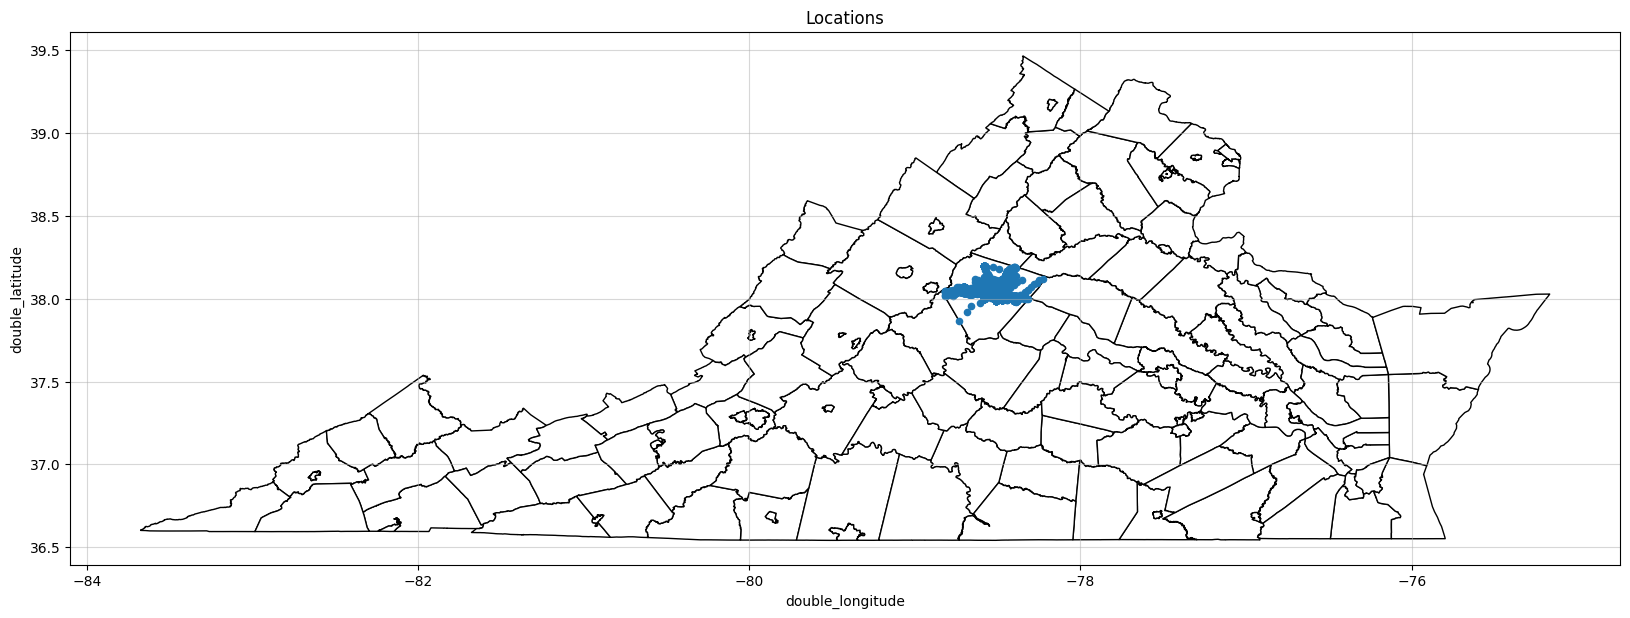

In [39]:
# plot each participant's data on a map

# initialize an axis
fig, ax = plt.subplots(figsize=(20,20))
# plot map on axis
va = va.plot(ax=ax, color='white', edgecolor='black')

# plot points
cville_revGeo.plot(x="double_longitude", y="double_latitude", kind="scatter", colormap="YlOrRd",
        title=f"Locations", 
        ax=ax)
# add grid
ax.grid(b=True, alpha=0.5)
plt.show()